# Data Exploration - EDA

In [47]:
# importing libraries
from utils.DataIngestion import get_config, get_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [48]:
# getting the config and data
config = get_config('data_exploration_config.yml')
path = get_path()
print("Path:",path)
input_file = config['file_names']['pickled_input_dataframe']
output_file = config['file_names']['pickled_output_dataframe']

Path, path_to_yaml: D:\Machine Learning\MACHINE LEARNING PROJECTS\airbnb_price_prediction\notebooks\data_exploration_config.yml
Path: D:\Machine Learning\MACHINE LEARNING PROJECTS\airbnb_price_prediction\data


In [49]:
# loading the data
df = pd.read_pickle(os.path.join(path, output_file))
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [50]:
# columns
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [51]:
# checking the statistical summary of the numerical features:
df[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,44977.000000,44977.000000,44977.000000,44977.000000,44977.000000
mean,116.017520,24.097428,1.110342,6.327523,108.634502
std,63.095803,45.453001,1.612773,29.839183,130.039172
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,65.000000,1.000000,0.050000,1.000000,0.000000
50%,100.000000,6.000000,0.390000,1.000000,38.000000
75%,150.000000,25.000000,1.620000,2.000000,215.000000
max,299.000000,629.000000,58.500000,327.000000,365.000000


### Visualization of Data

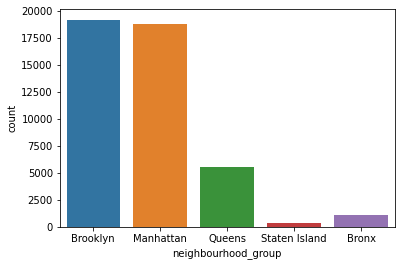

In [6]:
# looking at the neighbourhood_group
plt.figure()
sns.countplot(x='neighbourhood_group', data=df)
plt.show();

- Major Airbnb's are in Manhattan and Brooklyn.
- The least number of bookings are in the Staten Islands

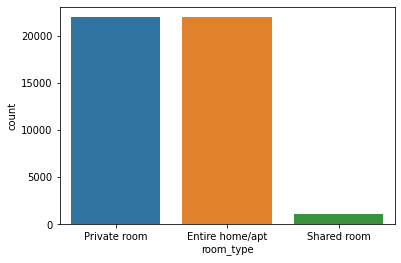

In [7]:
# looking at the room_type
plt.figure()
sns.countplot(x='room_type', data=df)
plt.show();

- Most people prefer either a Private Room or an Entire Home/Apartment
- Only a few people book Shared Rooms

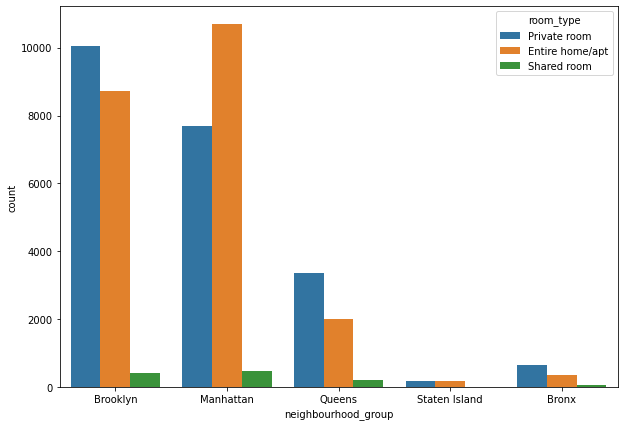

In [8]:
# distribution of room_type per neighbourhood_group
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, ax=ax)
plt.show();

- Most number of bookings of 'Entire Home/Apartment' are in Manhattan.
- Most number of bookings of 'Private Rooms' are in Brooklyn.

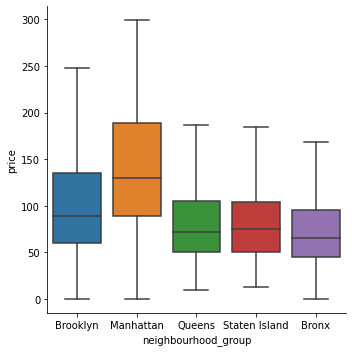

In [23]:
# area wise price
sns.catplot(x='neighbourhood_group', y='price', data=df, kind='box', showfliers=False);

In [14]:
print("Average Price for each Neighbourhood Group:")
print(df.groupby('neighbourhood_group')['price'].mean())

Average Price for each Neighbourhood Group:
neighbourhood_group
Bronx             75.858890
Brooklyn         103.345214
Manhattan        140.092000
Queens            87.649684
Staten Island     87.488950
Name: price, dtype: float64


- As we see from the plot and the text above, the highest average price of a booking was in Manhattan.
- While the lowest average price was in Bronx neighbourhood.

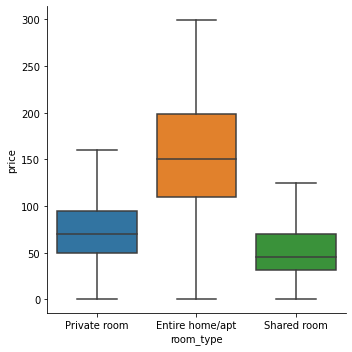

In [24]:
# room type wise price
sns.catplot(x='room_type', y='price', data=df, kind='box', showfliers=False);

In [16]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    156.816636
Private room        78.180789
Shared room         58.213592
Name: price, dtype: float64

- As expected, the highest average price is for renting an Entire Home/Apartment, followed by a Private Room and the least is for renting a Shared Room.

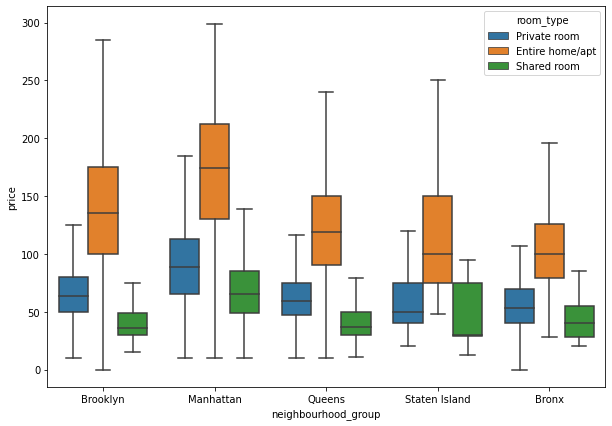

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df, ax=ax, showfliers=False)
plt.show();

- The same trend follows in each Neighbourhood Group and for each Room Type in that group.
    - Entire Home/Apt: Highest Average Price
    - Private Room: Second Highest Average Price
    - Shared Room: Least Average Price

###### Finding relation between Price and Number of Reviews

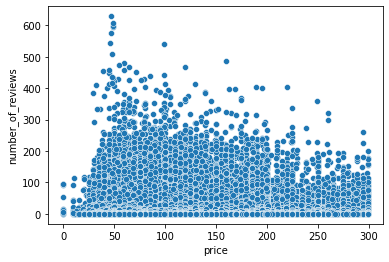

In [29]:
sns.scatterplot(x='price', y='number_of_reviews', data=df);

In [30]:
df['price'].corr(df['number_of_reviews'])

-0.020571812926849814

- There is no relation between the Price and Most Reviewed Properties.

###### Finding relation between Price and Minimum Nights

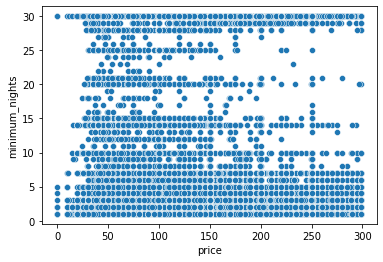

In [33]:
sns.scatterplot(x='price', y='minimum_nights', data=df);

In [34]:
df['price'].corr(df['minimum_nights'])

0.061917917591540764

- There is no relation between the Price and Minimum Nights

#### Plotting the Correlation Matrix

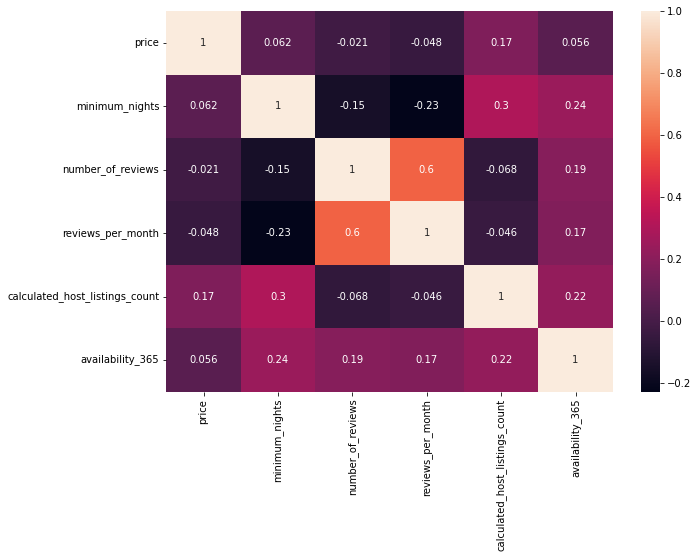

In [52]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True);